In [1]:
# Intro to Machine Learning
# Homework 3
# Michael Campo ID: 801147955

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
from IPython.utils import io


In [3]:
breast = load_breast_cancer()
breast_data = breast.data

In [4]:
breast_input = pd.DataFrame(breast_data)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
breast_labels = breast.target
breast_labels.shape
labels = np.reshape(breast_labels, (569,1))

(569,)

In [6]:
final_breast_data = np.concatenate([breast_data, labels],axis=1)
final_breast_data.shape

(569, 31)

In [7]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


# Problem 1

In [9]:
# Split data into Training and Test set
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(breast_dataset, train_size = 0.80, test_size = 0.20, random_state = 0)

Y_train = df_train.iloc[:,30].values
Y_test = df_test.iloc[:,30].values


In [10]:
# Feature scale the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train = sc.fit_transform(df_train)
test  = sc.fit_transform(df_test)

In [11]:
# Split data into feature inputs and outcome

trainData = np.asarray(train[:, 0:30])
testData = np.asarray(test[:, 0:30])
trainData.shape
testData.shape

(455, 30)

(114, 30)

In [12]:
# Import Logistic Regression Function
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(trainData, Y_train)

LogisticRegression()

In [13]:
Y_pred = classifier.predict(testData)
Y_pred[0:9]

array([0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
# Display the data in a Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

cnf_matrix = confusion_matrix(Y_test, Y_pred)
ac = accuracy_score(Y_test, Y_pred)
cnf_matrix
ac

array([[44,  3],
       [ 2, 65]], dtype=int64)

0.956140350877193

In [15]:
# Evalutate the model using evaluation metrics
from sklearn import metrics

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433


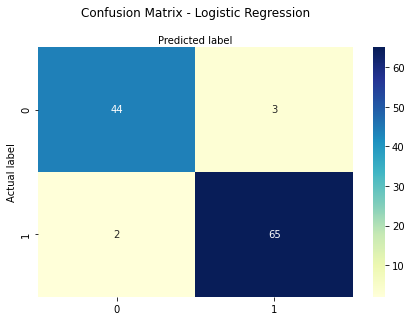

In [16]:
# Visualize the results of the model in the form of a heat map confusion matrix
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names));
plt.xticks(tick_marks, class_names);
plt.yticks(tick_marks, class_names);

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top");
plt.tight_layout();
plt.title('Confusion Matrix - Logistic Regression', y=1.1);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

# Problem 2

In [17]:
# Implement PCA into classification training
from sklearn.decomposition import PCA
pca_train = PCA(n_components=2)
pca_test = PCA(n_components=2)
trainData_pca = pca_train.fit_transform(trainData)
testData_pca = pca_test.fit_transform(testData)

In [18]:
classifier.fit(trainData_pca, Y_train)

LogisticRegression()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


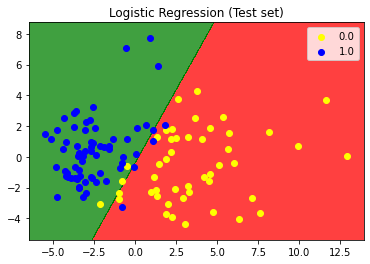

In [19]:
# Graph a scatter plot of PCA from test data
from matplotlib.colors import ListedColormap
X_set, Y_set = testData_pca, Y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max()+1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max()+1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set == j, 1],
c = ListedColormap(('yellow', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)');
plt.legend();
#plt.show()

In [20]:
# Make prediction using the new PCA features
Y_pred_pca = classifier.predict(testData_pca)

In [22]:
# Find the N value that gives the highest accuracy
#%%capture
pca_accuracy = np.zeros(30)
pca_precision = np.zeros(30)
pca_recall = np.zeros(30)
n = 0
best = 0

for i in range(1,31):
    pca_train = PCA(n_components=i)
    pca_test = PCA(n_components=i)
    trainData_pca = pca_train.fit_transform(trainData)
    testData_pca = pca_test.fit_transform(testData)
    classifier.fit(trainData_pca, Y_train);
    Y_pred_pca = classifier.predict(testData_pca)
    acc = metrics.accuracy_score(Y_test, Y_pred_pca)
    pca_accuracy[i-1] = metrics.accuracy_score(Y_test, Y_pred_pca)
    pca_precision[i-1] = metrics.precision_score(Y_test, Y_pred_pca)
    pca_recall[i-1] = metrics.recall_score(Y_test, Y_pred_pca)
    
    if (acc > best):
        best = acc
        n = i



LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

LogisticRegression()

Accuracy: 0.956140350877193
Precision: 0.9558823529411765
Recall: 0.9701492537313433


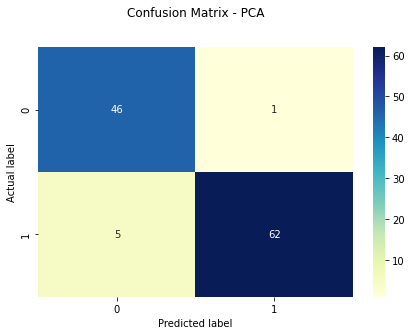

In [23]:
# Results using the best N value
cnf_matrix_pca = confusion_matrix(Y_test, Y_pred_pca)
cnf_matrix_pca

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_pca), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top");
plt.tight_layout();
plt.title('Confusion Matrix - PCA', y=1.1);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

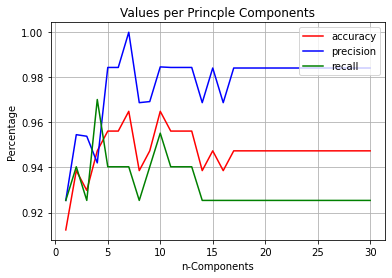

In [24]:
# plot the accuracy, precision, and recall

plt.plot(range(1,31), pca_accuracy, color='red', label="accuracy");
plt.plot(range(1,31), pca_precision, color='blue', label="precision");
plt.plot(range(1,31), pca_recall, color='green', label="recall");
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('n-Components');
plt.ylabel('Percentage');
plt.title('Values per Princple Components');
plt.legend(loc= "upper right");

# Problem 3

In [25]:
# Import LDA tools
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [26]:
LDA = LinearDiscriminantAnalysis(n_components = 1)
LDA.fit(trainData, Y_train)
p3 = LDA.fit(trainData, Y_train).transform(trainData)
p3.shape

LinearDiscriminantAnalysis(n_components=1)

(455, 1)

In [27]:
# Make prediction using the LDA model
Y_pred_lda = LDA.predict(testData)

Accuracy: 0.9385964912280702
Precision: 0.9054054054054054
Recall: 1.0


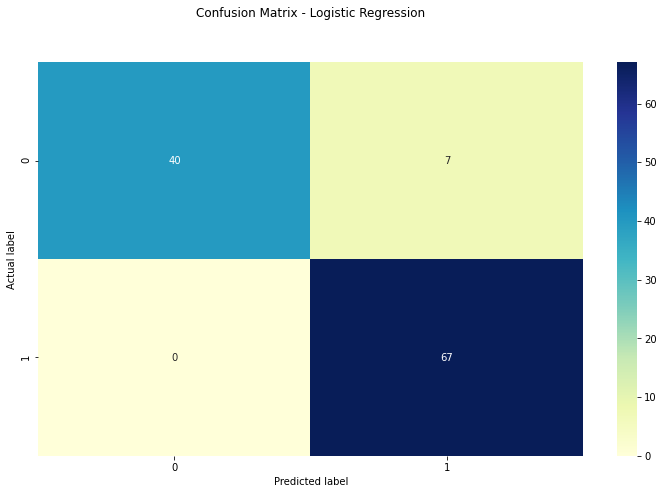

In [28]:
# Results using the LDA model
cnf_matrix_lda = confusion_matrix(Y_test, Y_pred_lda)
cnf_matrix_lda

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred_lda))
print("Precision:", metrics.precision_score(Y_test, Y_pred_lda))
print("Recall:", metrics.recall_score(Y_test, Y_pred_lda))

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_lda), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top");
plt.tight_layout();
plt.title('Confusion Matrix - Logistic Regression', y=1.1);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');